# Country Indices Data - Clustering Model
###### Anjani Kumar M

### Clustering countires into different categories for funding based on model results

In [1]:
# Modules/libraries required for the model

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

## 1. Data Preparation
### 1.1 Read data

In [2]:
#Read the input data (in .csv format) into 'country_ds' dataframe
country_ds = pd.read_csv(r'Country-data.csv')

### 1.2 EDA & Outlier Analysis

In [3]:
country_ds.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
country_ds.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

##### From the outset there are no object datatype columns apart from 'country'

In [5]:
country_ds.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

##### There are no nulls in the data. There is no need for null handling process 

In [6]:
country_ds.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


##### The difference between the 75th percentile and the max value is huge which might indicate outliers in the data 

In [7]:
### Except for 
country_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [8]:
country_num = country_ds.drop(['country'], axis=1)
country_num.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


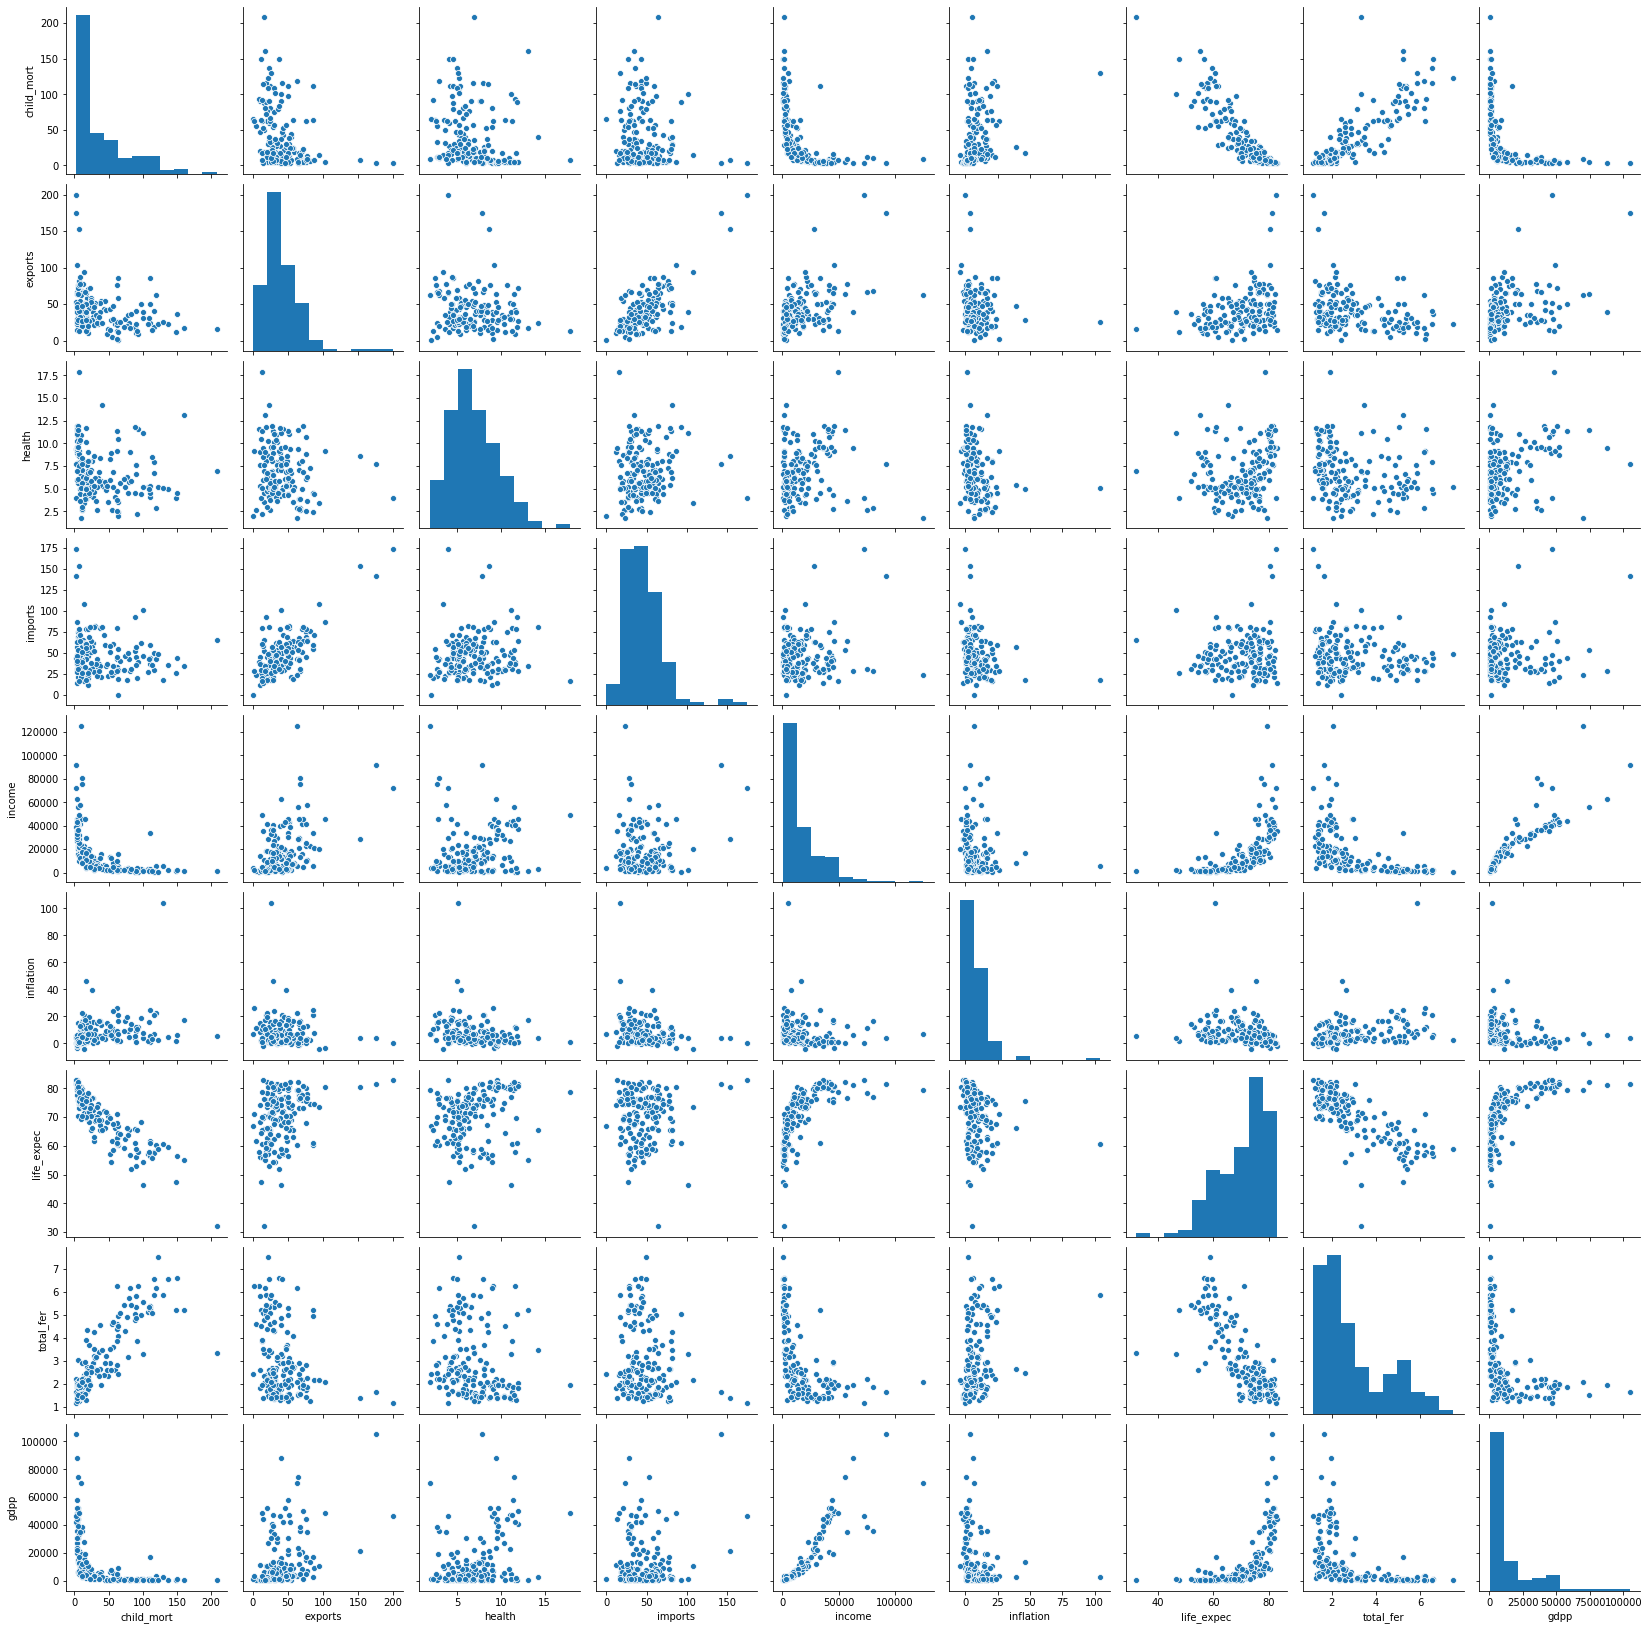

In [9]:
sns.pairplot(country_num)
plt.show()

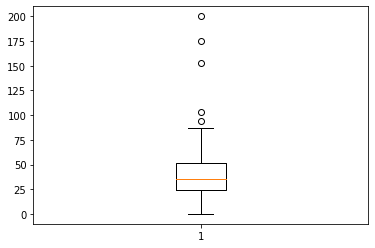

In [10]:
plt.boxplot(country_num.exports)
plt.show()

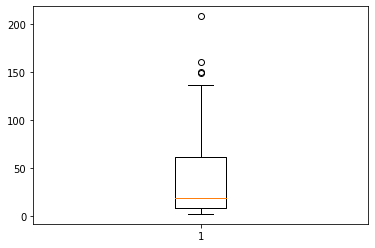

In [11]:
plt.boxplot(country_num.child_mort)
plt.show()

In [12]:
country_num.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

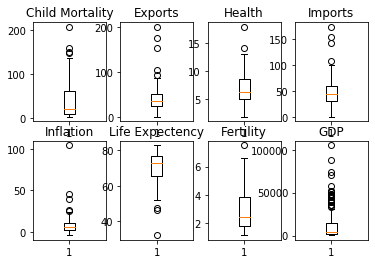

In [13]:
fig, ((child_mort,exports,health,imports), (inflation, life_expec, total_fer, gdpp)) = plt.subplots(2, 4)

child_mort.boxplot(country_num.child_mort)
child_mort.set_title('Child Mortality')

exports.boxplot(country_num.exports)
exports.set_title('Exports')

health.boxplot(country_num.health)
health.set_title('Health')

imports.boxplot(country_num.imports)
imports.set_title('Imports')


############

inflation.boxplot(country_num.inflation)
inflation.set_title('Inflation')

life_expec.boxplot(country_num.life_expec)
life_expec.set_title('Life Expectency')

total_fer.boxplot(country_num.total_fer)
total_fer.set_title('Fertility')

gdpp.boxplot(country_num.gdpp)
gdpp.set_title('GDP')


plt.show()


### 1.3 Outlier Treatment

#### There are outliers which can definitely be the case that soe countires GDP, Health Indicators factors will have drastically min/max values.

## 2. The Clustering Model
### 2.1 Data Scaling for Clustering Model

In [14]:
# initiate
scaler = StandardScaler()

# fit_transform
country_scaled = scaler.fit_transform(country_num)
country_scaled.shape

(167, 9)

In [15]:
country_scaled = pd.DataFrame(country_scaled)
country_scaled.columns = [ 'child_mort', 'exports', 'health', 'imports', 'income','inflation', 'life_expec', 'total_fer', 'gdpp']
country_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


### 2.2 Finding optimal number of clusters using Elbow Curve Method

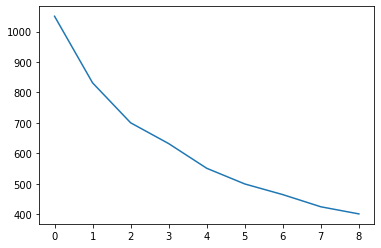

In [16]:
# elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(country_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)

In [17]:
print(ssd)

[1050.2145582853304, 831.4244352086874, 700.3229986404375, 632.0138132211393, 550.9802496891236, 499.5197645621979, 464.4887368606069, 424.5208898968471, 401.1272705938793]


In [18]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(country_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(country_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    
    

For n_clusters=2, the silhouette score is 0.2873566892140671
For n_clusters=3, the silhouette score is 0.28329575683463126
For n_clusters=4, the silhouette score is 0.303676957667828
For n_clusters=5, the silhouette score is 0.30576204229686116
For n_clusters=6, the silhouette score is 0.22800412573904708
For n_clusters=7, the silhouette score is 0.22367166357683999
For n_clusters=8, the silhouette score is 0.25421661107108406
For n_clusters=9, the silhouette score is 0.23559632976982495
For n_clusters=10, the silhouette score is 0.20505833535420606


#### a. The Elbow Curve tell us that there is no significant drop beyond n=4. This means optimal clusters ought to be <=4
#### b. At the same time, Silhouette Analysis depicts that after n=3, the average is in a decreasing trend

#### The final choice for number of clusters in Countires Clustering problem is 3. By intuition as well this feels right as we can categorize countires into 3 segments/clusters 1. Highly Developing Countires 2. Developing Countires 3. Under Developed Countries

### 2.3 Building K-Means Clustering Model

In [19]:
# Finla clustering model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(country_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [20]:
kmeans.labels_

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 2, 2,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 2, 1, 1, 0, 0, 1,
       0, 1, 2, 1, 1, 1, 0, 2, 2, 2, 1, 2, 1, 1, 0, 0, 2, 1, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       2, 2, 0, 0, 2, 1, 0, 1, 1, 1, 1, 1, 2, 2, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 2, 2, 2, 1, 0, 2, 2, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0])

##### Appending the k-means clustering results to the original dataset

In [21]:
# assign the label
country_ds['cluster_id'] = kmeans.labels_
country_ds.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1


### 2.4 Analyzing the clusters returned by K Means model
##### Analyzing the clusters based on columns GDPP

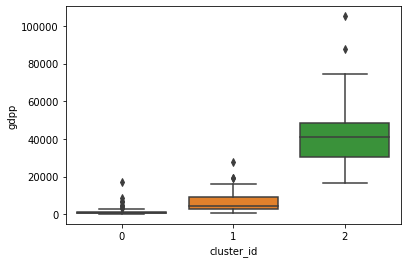

In [22]:
# plot
sns.boxplot(x='cluster_id', y='gdpp', data=country_ds)

##### Analyzing the clusters based on columns Child Mortality

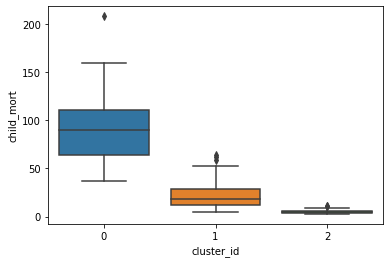

In [23]:
# plot
sns.boxplot(x='cluster_id', y='child_mort', data=country_ds)

##### Analyzing the clusters based on columns Income

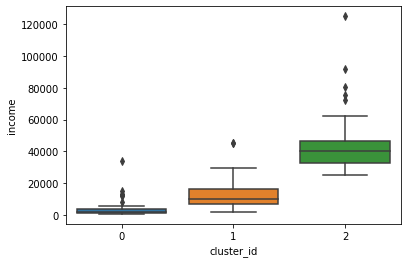

In [24]:
# plot
sns.boxplot(x='cluster_id', y='income', data=country_ds)

##### Analyzing the clusters based on columns - Child Mortality vs GDPP

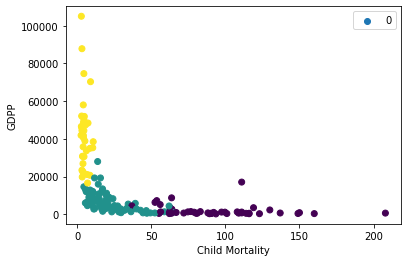

In [25]:
plt.scatter(
    country_ds['child_mort'], 
    country_ds['gdpp'],c=country_ds['cluster_id'])
plt.xlabel('Child Mortality')
plt.ylabel('GDPP');
plt.legend(country_ds['cluster_id'])
plt.show()

##### Analyzing the clusters based on columns - Child Mortality vs Income

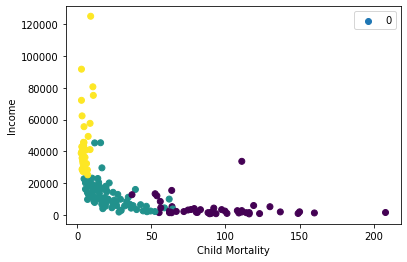

In [26]:
plt.scatter(
    country_ds['child_mort'], 
    country_ds['income'],c=country_ds['cluster_id'])
plt.xlabel('Child Mortality')
plt.ylabel('Income');
plt.legend(country_ds['cluster_id'])
plt.show()

In [27]:
# Cluster 0 clearly is the segment with under developed countries.
# Commom charecteristics - 
# 1. Low Income 
# 2. Low GDPP
# 3. High Child Mortality
# This is the cluster where funds should be flowing to. 

In [28]:
### Let's see which particular countires among the said cluster (0 - Under Developed Countries) need atmost/urgent funding 

In [52]:
Cluster_0 = country_ds['cluster_id'] == 0
countires_need_funding = country_ds[Cluster_0].sort_values(by=['child_mort'], ascending=False)
countires_need_funding.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,clusters_single_linkage,clusters_complete_linkage
66,Haiti,208.0,15.3,6.91,64.7,1500,5.45,32.1,3.33,662,0,0,0
132,Sierra Leone,160.0,16.8,13.10,34.5,1220,17.20,55.0,5.20,399,0,0,0
32,Chad,150.0,36.8,4.53,43.5,1930,6.39,56.5,6.59,897,0,0,0
31,Central African Republic,149.0,11.8,3.98,26.5,888,2.01,47.5,5.21,446,0,0,0
97,Mali,137.0,22.8,4.98,35.1,1870,4.37,59.5,6.55,708,0,0,0


### 2.5 Hierarchial Clustering
#### 2.5.1 Single Linkage

In [30]:
country_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


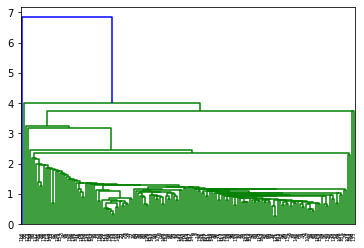

In [31]:
mergings_single = linkage(country_scaled, method="single", metric='euclidean')
dendrogram(mergings_single)
plt.show()

In [32]:
# 3 clusters
clusters_single_linkage = cut_tree(mergings_single, n_clusters=3).reshape(-1, )
clusters_single_linkage

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [33]:
# assign the label
country_ds['clusters_single_linkage'] = clusters_single_linkage
country_ds.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,clusters_single_linkage
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1,0


#### 2.5.2 Analyzing the clusters returned by Hierarchial Single Linkage model
##### Analyzing the clusters based on columns GDPP

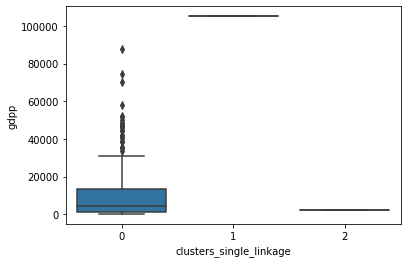

In [34]:
# plot
sns.boxplot(x='clusters_single_linkage', y='gdpp', data=country_ds)

##### Analyzing the clusters based on columns Child Mortality

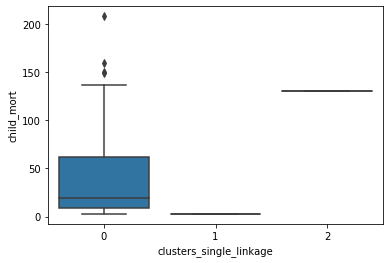

In [35]:
# plot
sns.boxplot(x='clusters_single_linkage', y='child_mort', data=country_ds)

##### Analyzing the clusters based on columns Income

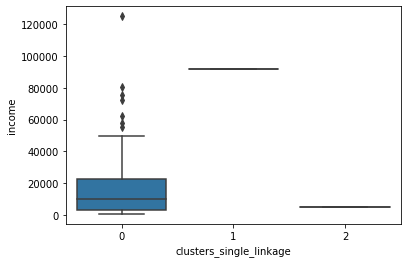

In [36]:
# plot
sns.boxplot(x='clusters_single_linkage', y='income', data=country_ds)

In [37]:
### Single Linkage Cluster Analysis
### There is no clear/useful clustering pattern while compareed to K-Means or Hierarchial Complete Linkage methods

#### 2.5.3 Complete Linkage

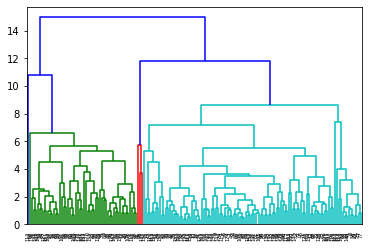

In [38]:
mergings_complete_linkage = linkage(country_scaled, method="complete", metric='euclidean')
dendrogram(mergings_complete_linkage)
plt.show()

In [39]:
# 3 clusters
clusters_complete_linkage = cut_tree(mergings_complete_linkage, n_clusters=3).reshape(-1, )
clusters_complete_linkage

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 2, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0])

In [40]:
# assign the label
country_ds['clusters_complete_linkage'] = clusters_complete_linkage
country_ds.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,clusters_single_linkage,clusters_complete_linkage
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0,0,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1,0,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1,0,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0,0,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1,0,1


#### 2.5.4 Analyzing the clusters returned by Hierarchial Complete Linkage model
##### Analyzing the clusters based on columns GDPP

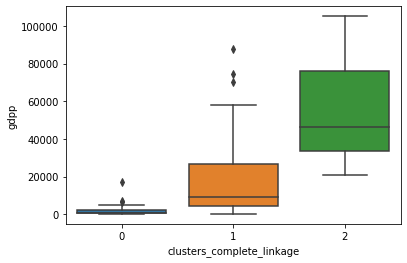

In [41]:
# plot
sns.boxplot(x='clusters_complete_linkage', y='gdpp', data=country_ds)

##### Analyzing the clusters based on columns Child Mortality

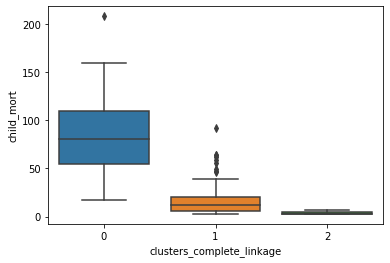

In [42]:
# plot
sns.boxplot(x='clusters_complete_linkage', y='child_mort', data=country_ds)

##### Analyzing the clusters based on columns Income

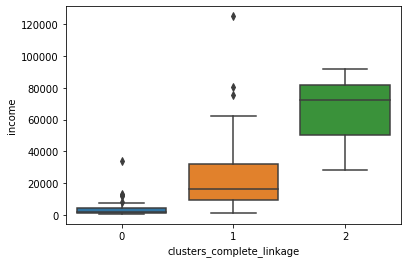

In [43]:
# plot
sns.boxplot(x='clusters_complete_linkage', y='income', data=country_ds)

##### Analyzing the clusters based on columns - Child Mortality vs GDPP

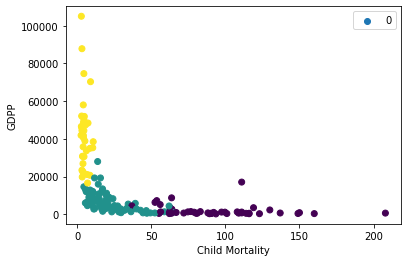

In [44]:
plt.scatter(
    country_ds['child_mort'], 
    country_ds['gdpp'],c=country_ds['cluster_id'])
plt.xlabel('Child Mortality')
plt.ylabel('GDPP');
plt.legend(country_ds['cluster_id'])
plt.show()

##### Analyzing the clusters based on columns - Child Mortality vs Income

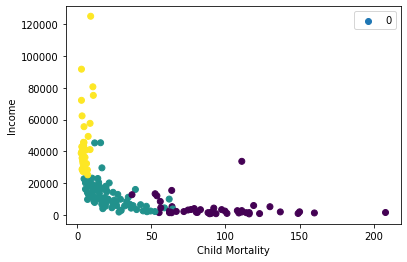

In [45]:

plt.scatter(
    country_ds['child_mort'], 
    country_ds['income'],c=country_ds['cluster_id'])
plt.xlabel('Child Mortality')
plt.ylabel('Income');
plt.legend(country_ds['cluster_id'])
plt.show()

In [46]:
# Cluster 0 clearly is the segment with under developed countries.
# Commom charecteristics - 
# 1. Low Income 
# 2. Low GDPP
# 3. High Child Mortality
# This is the cluster where funds should be flowing to. 

In [47]:
### Let's see which particular countires among the said cluster (0 - Under Developed Countries) need atmost/urgent funding 

In [48]:
Cluster_0 = country_ds['clusters_complete_linkage'] == 0
countires_need_funding_complete_linkage = country_ds[Cluster_0].sort_values(by=['child_mort'], ascending=False)
countires_need_funding_complete_linkage.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,clusters_single_linkage,clusters_complete_linkage
66,Haiti,208.0,15.3,6.91,64.7,1500,5.45,32.1,3.33,662,0,0,0
132,Sierra Leone,160.0,16.8,13.10,34.5,1220,17.20,55.0,5.20,399,0,0,0
32,Chad,150.0,36.8,4.53,43.5,1930,6.39,56.5,6.59,897,0,0,0
31,Central African Republic,149.0,11.8,3.98,26.5,888,2.01,47.5,5.21,446,0,0,0
97,Mali,137.0,22.8,4.98,35.1,1870,4.37,59.5,6.55,708,0,0,0


## 3. Conclusion

### Top 5 countires which require funding from International Organizations are 
#### 1. Haiti
#### 2. Sierra Leone
#### 3. Chad
#### 4. Central African Republic
#### 5. Mali

In [49]:
country_ds.to_csv('K_Means_Countries_Clustering_Output.csv')